In [1]:
# Import Modules
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load csv panel data file
file_path_panel = os.path.join("..", "Resources", "DataPanel.csv")

# Read panel csv and store as pandas df
panel_df = pd.read_csv(file_path_panel)

# Preview panel df
panel_df.head()

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258
1,Afghanistan,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237
2,Afghanistan,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275
3,Afghanistan,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267
4,Afghanistan,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268


In [3]:
# Load csv mortality data file
file_path_mort = os.path.join("..", "Resources", "MortalityData.csv")

# Read panel csv and store as pandas df
mort_df = pd.read_csv(file_path_mort)

# Preview panel df
mort_df.head()

,Country name,Population 2020,Population 2019,"COVID-19 deaths per 100,000 population in 2020",Median age,Island,Index of exposure to COVID-19 infections in other countries as of March 31,Log of average distance to SARS countries,WHO Western Pacific Region,Female head of government,Index of institutional trust,Gini coefficient of income,"All-cause death count, 2017","All-cause death count, 2018","All-cause death count, 2019","All-cause death count, 2020","Excess deaths in 2020 per 100,000 population, relative to 2017-2019 average"
0,United States,331002647.0,328239523.0,104.451,38.3,0,1.688,9.315,0,0,0.250,47.51,2810927.0,2839076.0,2852747.0,3424996.0,179.22
1,Egypt,102334403.0,100388073.0,7.457,25.3,0,1.627,9.007,0,0,0.446,31.56,NaN,NaN,NaN,NaN,NaN
2,Morocco,36910558.0,36471769.0,20.016,29.6,0,2.336,9.226,0,0,0.397,39.55,NaN,NaN,NaN,NaN,NaN
3,Lebanon,6825442.0,6855713.0,21.508,31.1,0,1.891,8.956,0,0,0.107,31.83,NaN,NaN,NaN,NaN,NaN
4,Saudi Arabia,34813867.0,34268528.0,17.875,31.9,0,1.250,8.897,0,0,0.651,45.90,NaN,NaN,NaN,NaN,NaN


In [4]:
# Create filtered df from panel_df to pull 2019 records (pre-pandemic)
panel_2019_df = panel_df.loc[panel_df.year == 2019, :]

# View filtered df
panel_2019_df

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
11,Afghanistan,2019,2.375,7.697,0.420,52.4,0.394,-0.108,0.924,0.351,0.502
23,Albania,2019,4.995,9.544,0.686,69.0,0.777,-0.099,0.914,0.681,0.274
32,Algeria,2019,4.745,9.337,0.803,66.1,0.385,0.005,0.741,0.585,0.215
50,Argentina,2019,6.086,10.000,0.896,69.0,0.817,-0.211,0.830,0.826,0.319
65,Armenia,2019,5.488,9.522,0.782,67.2,0.844,-0.172,0.583,0.598,0.430
...,...,...,...,...,...,...,...,...,...,...,...
1892,Venezuela,2019,5.081,NaN,0.888,66.7,0.626,NaN,0.839,0.761,0.351
1907,Vietnam,2019,5.467,8.992,0.848,68.1,0.952,-0.126,0.788,0.751,0.186
1919,Yemen,2019,4.197,NaN,0.870,57.5,0.651,NaN,0.798,0.543,0.213
1932,Zambia,2019,3.307,8.155,0.638,55.8,0.811,0.077,0.832,0.743,0.394


In [5]:
# Merge panel df with mortality df
merge_df = pd.merge(panel_2019_df, mort_df, how='left', on='Country name')

# Preview merged df
merge_df

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,...,Log of average distance to SARS countries,WHO Western Pacific Region,Female head of government,Index of institutional trust,Gini coefficient of income,"All-cause death count, 2017","All-cause death count, 2018","All-cause death count, 2019","All-cause death count, 2020","Excess deaths in 2020 per 100,000 population, relative to 2017-2019 average"
0,Afghanistan,2019,2.375,7.697,0.420,52.4,0.394,-0.108,0.924,0.351,...,8.623,0.0,0.0,0.046,31.000,NaN,NaN,NaN,NaN,NaN
1,Albania,2019,4.995,9.544,0.686,69.0,0.777,-0.099,0.914,0.681,...,9.036,0.0,0.0,0.150,28.960,NaN,NaN,NaN,NaN,NaN
2,Algeria,2019,4.745,9.337,0.803,66.1,0.385,0.005,0.741,0.585,...,9.159,0.0,0.0,0.415,27.620,NaN,NaN,NaN,NaN,NaN
3,Argentina,2019,6.086,10.000,0.896,69.0,0.817,-0.211,0.830,0.826,...,9.717,0.0,0.0,0.091,39.600,NaN,NaN,NaN,NaN,NaN
4,Armenia,2019,5.488,9.522,0.782,67.2,0.844,-0.172,0.583,0.598,...,8.858,0.0,0.0,0.174,33.620,27367.0,25645.0,26252.0,35371.0,302.304
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,Venezuela,2019,5.081,NaN,0.888,66.7,0.626,NaN,0.839,0.761,...,9.564,0.0,0.0,0.120,37.800,NaN,NaN,NaN,NaN,NaN
140,Vietnam,2019,5.467,8.992,0.848,68.1,0.952,-0.126,0.788,0.751,...,8.108,1.0,0.0,0.490,40.100,NaN,NaN,NaN,NaN,NaN
141,Yemen,2019,4.197,NaN,0.870,57.5,0.651,NaN,0.798,0.543,...,8.966,0.0,0.0,0.267,36.710,NaN,NaN,NaN,NaN,NaN
142,Zambia,2019,3.307,8.155,0.638,55.8,0.811,0.077,0.832,0.743,...,9.251,0.0,0.0,0.322,57.140,NaN,NaN,NaN,NaN,NaN


In [6]:
# Export merged df for easier viewing
# Create export file path for merged df
output_merge_file_path = os.path.join("..", "Resources", "MergeData.csv")

# Export csv file
merge_df.to_csv(output_merge_file_path)

In [7]:
# Consolidate merged df to only include relevant columns
df = merge_df.iloc[:, np.r_[0:11, 13, 20:22, 26]]

# Preview df
df

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,"COVID-19 deaths per 100,000 population in 2020",Index of institutional trust,Gini coefficient of income,"Excess deaths in 2020 per 100,000 population, relative to 2017-2019 average"
0,Afghanistan,2019,2.375,7.697,0.420,52.4,0.394,-0.108,0.924,0.351,0.502,5.628,0.046,31.000,NaN
1,Albania,2019,4.995,9.544,0.686,69.0,0.777,-0.099,0.914,0.681,0.274,41.038,0.150,28.960,NaN
2,Algeria,2019,4.745,9.337,0.803,66.1,0.385,0.005,0.741,0.585,0.215,6.285,0.415,27.620,NaN
3,Argentina,2019,6.086,10.000,0.896,69.0,0.817,-0.211,0.830,0.826,0.319,95.684,0.091,39.600,NaN
4,Armenia,2019,5.488,9.522,0.782,67.2,0.844,-0.172,0.583,0.598,0.430,95.268,0.174,33.620,302.304
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,Venezuela,2019,5.081,NaN,0.888,66.7,0.626,NaN,0.839,0.761,0.351,3.615,0.120,37.800,NaN
140,Vietnam,2019,5.467,8.992,0.848,68.1,0.952,-0.126,0.788,0.751,0.186,0.036,0.490,40.100,NaN
141,Yemen,2019,4.197,NaN,0.870,57.5,0.651,NaN,0.798,0.543,0.213,2.045,0.267,36.710,NaN
142,Zambia,2019,3.307,8.155,0.638,55.8,0.811,0.077,0.832,0.743,0.394,2.110,0.322,57.140,NaN


In [8]:
# Run correlations between variables
df.corr()

,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,"COVID-19 deaths per 100,000 population in 2020",Index of institutional trust,Gini coefficient of income,"Excess deaths in 2020 per 100,000 population, relative to 2017-2019 average"
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Life Ladder,NaN,1.000000,0.752559,0.729498,0.762322,0.586030,0.030650,-0.424911,0.476810,-0.497805,0.411507,0.071742,-0.273732,-0.279741
Log GDP per capita,NaN,0.752559,1.000000,0.760484,0.850274,0.413016,-0.183559,-0.346385,0.244877,-0.537490,0.487179,0.020130,-0.308974,-0.263087
Social support,NaN,0.729498,0.760484,1.000000,0.679219,0.425266,-0.063704,-0.218599,0.347142,-0.693343,0.386299,-0.060195,-0.299992,-0.286012
Healthy life expectancy at birth,NaN,0.762322,0.850274,0.679219,1.000000,0.459566,-0.156005,-0.363880,0.264581,-0.476146,0.505763,0.010260,-0.377777,-0.259519
Freedom to make life choices,NaN,0.586030,0.413016,0.425266,0.459566,1.000000,0.165650,-0.419575,0.601147,-0.434621,0.114207,0.450330,-0.009091,-0.180461
Generosity,NaN,0.030650,-0.183559,-0.063704,-0.156005,0.165650,1.000000,-0.206522,0.177855,0.029455,-0.269652,0.393049,-0.039671,-0.387291
Perceptions of corruption,NaN,-0.424911,-0.346385,-0.218599,-0.363880,-0.419575,-0.206522,1.000000,-0.231782,0.284097,0.096862,-0.684115,0.213016,0.349555
Positive affect,NaN,0.476810,0.244877,0.347142,0.264581,0.601147,0.177855,-0.231782,1.000000,-0.407342,0.028269,0.224482,0.156864,-0.268541
Negative affect,NaN,-0.497805,-0.537490,-0.693343,-0.476146,-0.434621,0.029455,0.284097,-0.407342,1.000000,-0.103648,-0.119784,0.307828,0.450367


0       5.628
1      41.038
2       6.285
3      95.684
4      95.268
        ...  
139     3.615
140     0.036
141     2.045
142     2.110
143     2.442
Name: COVID-19 deaths per 100,000 population in 2020, Length: 144, dtype: float64

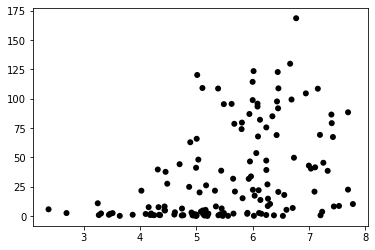

In [13]:
# Create initial scatter plots to investigate potential relationships between happiness/death rates
# Pull columns of interest into series
life_ladder = df["Life Ladder"]
covid_death_rate = df["COVID-19 deaths per 100,000 population in 2020"]



# Create scatter plot comparing the two stats
plt.scatter(life_ladder, covid_death_rate, marker="o", facecolors="black", edgecolors="none")
# plt.title("Weight vs. Average Tumor Volume for Mice Treated with Capomulin")
# plt.xlabel("Weight (g)")
# plt.ylabel("Tumor Volume (mm3)")
# plt.ylim(0, 50)
# plt.xlim(0, 27)

# Display the chart
# plt.show()

covid_death_rate

In [19]:
quartiles = covid_death_rate.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of temperatures is: {lowerq}")
print(f"The upper quartile of temperatures is: {upperq}")
print(f"The interquartile range of temperatures is: {iqr}")
print(f"The the median of temperatures is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of temperatures is: 1.7890000000000001
The upper quartile of temperatures is: 53.558
The interquartile range of temperatures is: 51.769
The the median of temperatures is: 14.704 
Values below -75.86449999999999 could be outliers.
Values above 131.2115 could be outliers.


(0.0, 350.0)

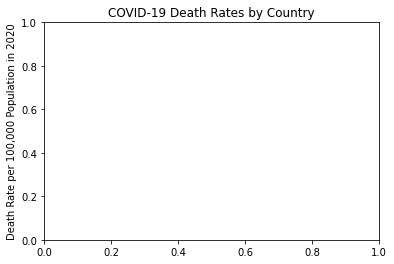

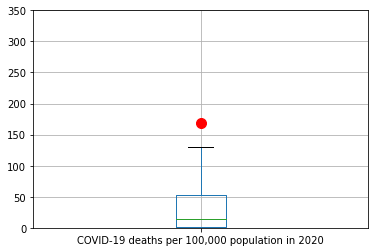

In [20]:
# Make box and whisker plot of COVID-19 death rates to identify outliers that may influence correlations
# Format the appearance of outlier circles on the plot
flierprops = dict(marker='o', markerfacecolor='red', markersize=10,
                  markeredgecolor='red')

# Create the graph
fig1, ax1 = plt.subplots()
plt.figure()
ax1.set_title('COVID-19 Death Rates by Country')
ax1.set_ylabel('Death Rate per 100,000 Population in 2020')

df.boxplot(["COVID-19 deaths per 100,000 population in 2020"], flierprops=flierprops)
plt.ylim(0, 350)

In [ ]:
# What may be the difference between death rate vs excess deaths that explains very different correlation coefficients?
# Remove outliers in death rate/excess deaths?
# Sort to see what types of countries had highest death rathes/excess deaths versus those with lowest?
# If developed countries had higher death rates generally, they also have higher quality of life indicators.
# So, maybe the COVID death rates were highly influenced by other factors like politics, which would make happiness factors mostly irrelevant.
# 
# Look at chapter 2 - similar issues examined.
# Could look at political variables.